<a href="https://colab.research.google.com/github/sriramreddy-7/Generative-AI/blob/main/ASSIGN_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from scipy import stats
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [65]:
df=pd.read_csv('/content/IRIS.csv')

In [66]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [70]:
one_hot_encoded = pd.get_dummies(df['species'])

# Concatenate one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Print the updated DataFrame
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species  \
0             5.1          3.5           1.4          0.2     Iris-setosa   
1             4.9          3.0           1.4          0.2     Iris-setosa   
2             4.7          3.2           1.3          0.2     Iris-setosa   
3             4.6          3.1           1.5          0.2     Iris-setosa   
4             5.0          3.6           1.4          0.2     Iris-setosa   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3  Iris-virginica   
146           6.3          2.5           5.0          1.9  Iris-virginica   
147           6.5          3.0           5.2          2.0  Iris-virginica   
148           6.2          3.4           5.4          2.3  Iris-virginica   
149           5.9          3.0           5.1          1.8  Iris-virginica   

     Iris-setosa  Iris-versicolor  Iris-virginica  
0              1       

In [71]:
df=df.drop(['species'],axis=1)

<Axes: >

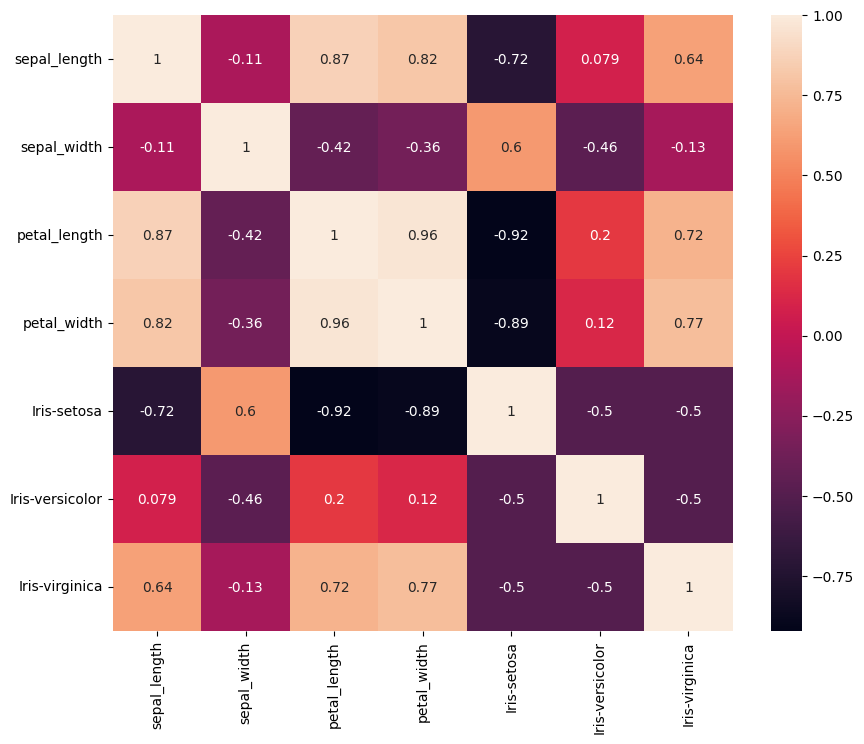

In [74]:
corr = df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [75]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [76]:
from keras.models import Sequential
from keras.layers import Dense

In [80]:
classifier = Sequential()

# adding the input layer and the first hidden layer
classifier.add(Dense(units = 500, activation = 'sigmoid', input_dim = 6))

# adding the second hidden layer
classifier.add(Dense(units = 100, activation = 'sigmoid'))

# adding another hidden layer
classifier.add(Dense(units = 50, activation = 'sigmoid'))

# adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

score, acc = classifier.evaluate(X_train, y_train, batch_size = 10)
print('Train score: ', score)
print('Train accuracy: ', acc)

12/12 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
Train score:  0.0016411436954513192
Train accuracy:  1.0


In [81]:
# predicting the Test set results
y_pred = classifier.predict(X_test)

score, acc = classifier.evaluate(X_test, y_test, batch_size = 10)
print('Test score:', score)
print('Test accuracy:', acc)

3/3 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Test score: 0.0013081133365631104
Test accuracy: 1.0


In [82]:
y_pred

array([[9.9737543e-01],
       [7.4621284e-04],
       [5.4805388e-04],
       [9.9760729e-01],
       [5.5584859e-04],
       [9.9772841e-01],
       [5.5319874e-04],
       [1.4855724e-03],
       [1.6712882e-03],
       [7.9038372e-04],
       [9.9665046e-01],
       [1.1487915e-03],
       [1.1150504e-03],
       [1.4941912e-03],
       [1.3653531e-03],
       [5.5543153e-04],
       [1.2564947e-03],
       [9.3151000e-04],
       [5.6018971e-04],
       [5.5310864e-04],
       [9.9657130e-01],
       [1.1924647e-03],
       [5.6736765e-04],
       [5.5726228e-04],
       [9.9571556e-01],
       [5.4440292e-04],
       [5.7158142e-04],
       [8.9997711e-04],
       [6.2194915e-04],
       [5.6592934e-04]], dtype=float32)

In [83]:
# converting results into categorical values
for i in range(0, len(y_pred)):
    if y_pred[i][0] >= 0.5:
        y_pred[i][0] = 1
    else:
        y_pred[i][0] = 0
y_pred

array([[1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [88]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  0],
       [ 0,  6]])

In [89]:
import seaborn as sns

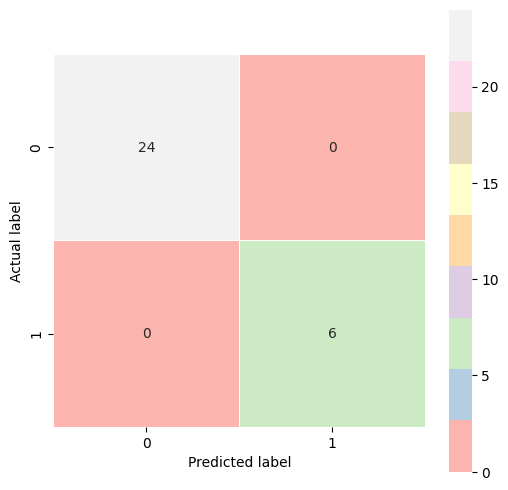

In [90]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [91]:
class_names = ['0','1']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

